## Ex 10.1

An introduction to Pytorch
A more tutorials on how to run pytorch can be found at: https://pytorch.org/tutorials/ 


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn,tensor

## 1.1 PyTorch Tensors
https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

The basic data type in PyTorch are tensors, they resemble Numpy Arrays, but are optimized to be used inside the Machine Learning Model. <br> 
In order to familiarize with tensors: <br>
1)Construct one tensor from a Python list <br>
2)Construct one tensor from a random numpy array <br>
3)Generate three tensors (one with random elements, one with all elemnts equal to 1, the third with all zeros) of shape (3,3) using the relative functions inside the module torch. <br>
4)Notice that tensors, like numpy arrays, support most of the standard mathematical operations, compute three different matematical operations (based on your choice) using the previously generated tensors <br>
5)Transform the results of your operations to numpy arrays.

In [62]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


#### 1)

In [63]:
list = [
    [[1, 2, 3], [2, 3, 1], [3, 1, 2]],
    [[2, 3, 4], [3, 4, 2], [4, 2, 3]],
    [[3, 4, 5], [4, 5, 3], [5, 3, 4]],
]
ten = tensor(list)
print(ten)

tensor([[[1, 2, 3],
         [2, 3, 1],
         [3, 1, 2]],

        [[2, 3, 4],
         [3, 4, 2],
         [4, 2, 3]],

        [[3, 4, 5],
         [4, 5, 3],
         [5, 3, 4]]])


#### 2)

In [64]:
arr = np.random.rand(3, 3, 3)
ten = tensor(arr)
print(ten)

tensor([[[0.3729, 0.1187, 0.6435],
         [0.3552, 0.9865, 0.5476],
         [0.0885, 0.1993, 0.8517]],

        [[0.1160, 0.2252, 0.7338],
         [0.3652, 0.8718, 0.0362],
         [0.0754, 0.2944, 0.6254]],

        [[0.2920, 0.5100, 0.5860],
         [0.9426, 0.0457, 0.7766],
         [0.5227, 0.8084, 0.9412]]], dtype=torch.float64)


#### 3)

In [65]:
random_tensor = torch.randn(3, 3)
ones_tensor = torch.ones(3, 3)
zeros_tensor = torch.zeros(3, 3)
print(random_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[-0.0633, -0.0138, -1.2710],
        [ 0.6093, -1.1052, -0.2912],
        [-0.9621, -0.6913, -0.6902]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


#### 4)

In [66]:
a = random_tensor + ones_tensor
b = random_tensor - ones_tensor
c = random_tensor * zeros_tensor
print(a)
print(b)
print(c)

tensor([[ 0.9367,  0.9862, -0.2710],
        [ 1.6093, -0.1052,  0.7088],
        [ 0.0379,  0.3087,  0.3098]])
tensor([[-1.0633, -1.0138, -2.2710],
        [-0.3907, -2.1052, -1.2912],
        [-1.9621, -1.6913, -1.6902]])
tensor([[-0., -0., -0.],
        [0., -0., -0.],
        [-0., -0., -0.]])


#### 5)

In [67]:
d = np.array(random_tensor)
e = np.array(ones_tensor)
f = np.array(zeros_tensor)
print(d)
print(e)
print(f)

[[-0.06334199 -0.01384032 -1.2709517 ]
 [ 0.60934824 -1.1051835  -0.29120713]
 [-0.9620775  -0.6912633  -0.69017065]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## 1.2 DataSets
In Pytorch data are grouped in Datasets, to define a costum dataset, you need to derive a costum class from the torch.utils.data.Dataset class (see class inheritance in Python).<br>
A Dataset class must implement three functions: __init__, __len__, and __getitem__ , as in the following example:

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files


    import os
    import pandas as pd
    from torchvision.io import read_image
    from torch.utils.data import Dataset
    
    class CustomImageDataset(Dataset):
        def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
            self.img_labels = pd.read_csv(annotations_file)
            self.img_dir = img_dir
            self.transform = transform
            self.target_transform = target_transform

        def __len__(self):
            return len(self.img_labels)

        def __getitem__(self, idx):
            img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
            image = read_image(img_path)
            label = self.img_labels.iloc[idx, 1]
            if self.transform:
                image = self.transform(image)
            if self.target_transform:
                label = self.target_transform(label)
            return image, label
In the example above the initializer saves a list of file names (img_labels) in the Dataset instance.
The \__getitem__(n) function reads from the hard drive the nth. 


1)Create two random tensors (X,Y) of length 200.<br>
2)Define a costum dataset which contains as objects two tensors (X and Y). The method \__getitem__(n) should return the nth values of these tensors\
3) Test if the code works

#### 1)

In [68]:
X = torch.randn(200)
Y = torch.randn(200)

#### 2)

In [69]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __getitem__(self, n):
        return self.X[n], self.Y[n]

    def __len__(self):
        return len(self.X)

#### 3)

In [70]:
Set = CustomDataset(X, Y)

n = 50
x_value, y_value = Set[n]
print(f"X[{n}]: {x_value}")
print(f"Y[{n}]: {y_value}")

X[50]: -0.8073201179504395
Y[50]: 0.8699907660484314


## 1.3 Neural Layers
Neural layers are function which apply transformations to tensors.
The linear transformation ($ y=x A^T +b$) is among the simplest:
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

1) create a linear layer which has both as input and output one element tensors. <br>
2) Find the parameters ($a$ and $b$) of the 1D transformation, trying to apply the transformation to different tensor (notice that the paramenter are randomly created every time you create a new layer)<br>
3) concatenate two layers in order to produce from a scalar imput an inter 3 elements tensor and a 9 element tensor in the end.

In [71]:
lin_lay = nn.Linear(1, 1)
a = lin_lay.weight.item()
b = lin_lay.bias.item()

print(a, b)

concatenated_layer = nn.Sequential(nn.Linear(1, 3), nn.Linear(3, 9))
ten = concatenated_layer(tensor([1], dtype=torch.float32))
print(ten.shape)
print(ten)

-0.29647958278656006 0.8189126253128052
torch.Size([9])
tensor([-1.4194, -0.7538,  0.0180,  0.8841, -0.4028, -1.2617, -0.5459,  0.2718,
        -0.2800], grad_fn=<AddBackward0>)


## 1.4 Non linear activation functions
In the pytorch docs: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

One way to introduce non linearity in machine learning models is through the use of activation functions. 

1) Import from pytorch the Rectified Linear Unit function " ReLU "  and the hyperbolic tangent "tanh" function
2) Create a tensor of 100 evenly spaced points between -1 and 1
3) Plot the outputs of the two activation functions taking as argument the previously defined vector



In [72]:
from torch import relu, tanh

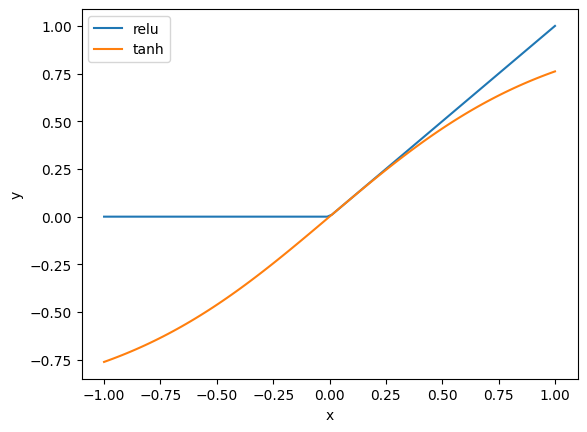

In [73]:
ten = tensor(np.linspace(-1, 1, 100))
plt.plot(ten, relu(ten))
plt.plot(ten, tanh(ten))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["relu", "tanh"])

## 1.5 Loss functions 
The way to measure the error of a Machine Learning prediction is through the use of one of the loss function. A list of the loss functions implemented in pytorch can be found here:
https://pytorch.org/docs/stable/nn.html#loss-functions

One of the most important loss functions for regression problems is the Mean Square Error (MSE loss function)

https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss

* Create two random tensors of length 4 
* Compute the mean squared difference of the two vectors using the pytorch's MSE Loss function 
* Compute the mean squared difference of the two vectors using standard matematical operations on tensors


In [74]:
ten1 = torch.randn(4)
ten2 = torch.randn(4)

loss = nn.MSELoss()
print(loss(ten1, ten2))

diff = ten1 - ten2
diff2 = diff**2
meansq = diff2.mean()
print(meansq)

tensor(0.9849)
tensor(0.9849)


# Example Neural Networks for Classification
Here we will provide a code snippet that classifies a dataset of handwritten digits. The layout of the code will provide you with insights and by adapting it, you will solve a classification problem in the next exercise.

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

First, we will download the dataset and put it into datastructures provided by Pytorch. The transforms used here are specific to the dataset and transform the images into a `torch.tensor`, which is the datastructure used by pytorch (for an in depth tutorial on how Pytorch works and can be used for custom problems you can visit the [tutorials](https://pytorch.org/tutorials/)). In a second step the data points are normalized, which is a usual preprocessing step when training neural networks.

In [76]:
# here we just create a directory "mnist" to store the dataset in
!mkdir mnist

A subdirectory or file mnist already exists.


In [77]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)
dataset_train = datasets.MNIST(
    "./mnist/", train=True, download=True, transform=transform
)
dataset_test = datasets.MNIST("./mnist/", train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=16)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=16)

Here you can have a look at the dataset to get a feeling on how it looks. The goal of the neural network is to use the image as an input and predict the number the image shows.

7 (28, 28)
0 (28, 28)
3 (28, 28)
8 (28, 28)
7 (28, 28)


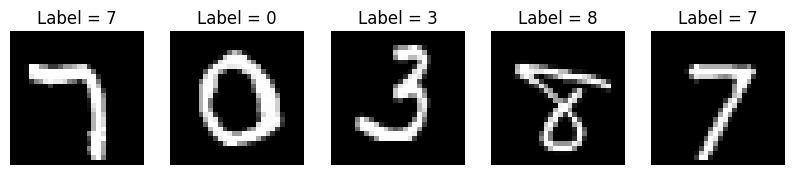

In [78]:
plt.figure(figsize=(10, 2), dpi=100)
for k, i in enumerate(np.random.randint(0, len(dataset_train), 5)):
    plt.subplot(1, 5, k + 1)
    img, label = train_loader.dataset[i]
    img = img[0].numpy()
    print(label, img.shape)
    plt.imshow(img, cmap="gray")
    plt.title("Label = " + str(label))
    plt.axis("off")
plt.show()

For this prediction we will use a simple feedforward neural network architecture with one hidden layer and  ReLU-activation function. This activation function has excellent properties for training neural networks, since they solve the vanishing gradient problem and allow for deeper neural networks, but there are many different activation functions that can be used (see the [documentation](https://pytorch.org/docs/stable/nn.html) for a full list).
$$\mathrm{ReLU}(x) = max(0,x)$$
As output activation we use a logarithmic softmax, which can be seen as a mapping to the likelihoods of an image belonging to a certain class.

The architecture of our neural network consists of two fully connected layers defined in `__init__(self)`, which first map the $28*28=784$ pixels to 128 intermidiate values via matrix multiplication and an added bias term. This intermidiate vector is then mapped to a 10-dimensional ouput vector. The `forward(self, x)` method defines the forward pass of the neural network, where first the image is flattened into a vector, then the first fully connected layer is applied, then a ReLU activation, then the second fully connected layer and finally the logarithmic softmax function.

In [79]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

After defining our architecture, we need to perform the training of the parameters. This optimization procedure is in most instances based on a gradient descent variety. Since we have a lot of training samples here, computing the full gradient of the loss function with respect to each adaptable weight is very expensive. Instead we opt for an approximation of the gradient of a minibatch of samples (e.g. 16 samples). This gives an approximate gradient direction, which allows us to update our weights and minimize our loss function more efficiently. Below you find a loop over our training and testing dataset. Read through the code and try to understand what each statement means and what happens.

Run the loop below and train the model (this might take a while).

In [80]:
# number of iterations
epochs = 0
# step width in gradient-based optimization
learning_rate = 0.01
# initialize our model with random parameters
model = Net()
# choose an optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# choose a loss function
loss_function = F.nll_loss

# initialize lists for plotting
learning_curve_train = []
learning_curve_test = []

for epoch in range(1, epochs + 1):
    # temporary variables to track model convergence
    loss_train = []
    loss_test = []
    correct = 0

    # Training Loop
    for data, target in train_loader:
        # set gradient to zero
        optimizer.zero_grad()
        # predict with current model
        output = model(data)
        # compute loss of predictions and target values
        loss = loss_function(output, target)
        # Backpropagation of errors gives gradients
        loss.backward()
        # Update weights with approximate gradient
        optimizer.step()
        # Store loss
        loss_train.append(loss.item())

    # Stop tracking gradients for evaluation phase
    with torch.no_grad():
        # Test Loop
        for data, target in test_loader:
            # predict with current model
            output = model(data)
            # compute loss
            loss = loss_function(output, target)
            # store loss
            loss_test.append(loss.item())
            # transform output into predicted class
            pred = output.argmax(dim=1, keepdim=True)
            # compare predictions and labels and store
            # number of correct predictions
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Store loss at each iteration for plotting
    learning_curve_train.append(np.mean(loss_train))
    learning_curve_test.append(np.mean(loss_test))

    # Print to Stdout
    print(
        "Epoch: {}\tTrain loss: {:.4f}\tTest loss: {:.4f}\tTest Accuracy: {}/{} ({:.0f}%)".format(
            epoch,
            learning_curve_train[-1],
            learning_curve_test[-1],
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

We can check if the model generalizes by looking at the learning curve (loss of training and testing data at each iteration).

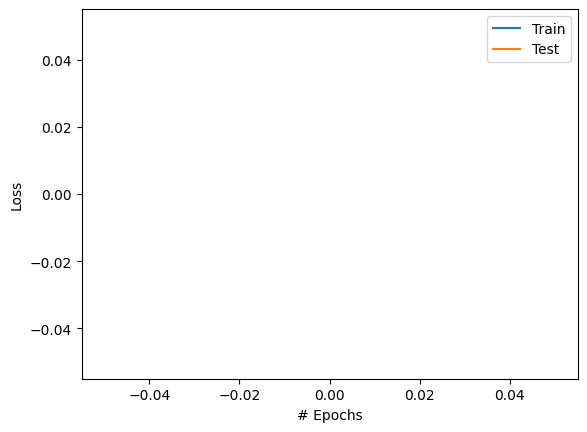

In [81]:
plt.plot(np.arange(1, epochs + 1), learning_curve_train, label="Train")
plt.plot(np.arange(1, epochs + 1), learning_curve_test, label="Test")
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.legend()

Now we can look at some of the predictions.

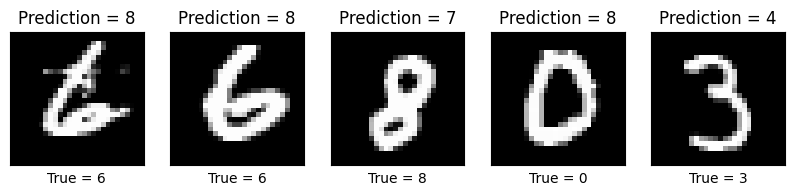

In [82]:
plt.figure(figsize=(10, 2), dpi=100)
for k, i in enumerate(np.random.randint(0, len(dataset_test), 5)):
    plt.subplot(1, 5, k + 1)
    img, label = test_loader.dataset[i]
    pred = torch.argmax(model(img)).item()
    img = img[0].numpy()
    plt.imshow(img, cmap="gray")
    plt.title("Prediction = " + str(pred))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("True = " + str(label))
plt.show()

In [83]:
mim, Mim = (test_loader.dataset[7][0].numpy()).min(), (
    test_loader.dataset[7][0].numpy()
).max()
mim, Mim, Mim - mim

(-0.42421296, 2.8214867, 3.2456996)

# Ex 10.2

## Classification of Stars 
In this exercise we are going to adapt the previously provided code to work on a comparatively small dataset of star measurements from [Kaggle](https://www.kaggle.com/deepu1109/star-dataset). From just four measurements (Temperature, Luminosity, Radius, Absolute magnitude), we will try to predict the star type (Browm Dwarf, Red Dwarf, White Dwarf, Main Sequence, Supergiant, Hypergiant) by using a Feedforward Neural Network architecture that was trained on 200 measurements. By determining hyperparameters we will optimize our model before we will test the generalization of the model to not seen instances.

### Class Dataset

In [85]:
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        star_attributes = torch.Tensor(self.data[index])
        star_label = torch.Tensor([self.labels[index]])
        
        return star_attributes, star_label

### Class nNet

In [86]:
class Star_Net(nn.Module):
    def __init__(self):
        super(Star_Net, self).__init__()
        self.fc1 = nn.Linear(4,16)
        self.fc2 = nn.Linear(16,7)
        
        # Convert weight tensor to float
        self.fc1.weight.data = self.fc1.weight.data.float()
        self.fc2.weight.data = self.fc2.weight.data.float()

    def forward(self, x):
        x = F.relu(self.fc1(x.to(self.fc1.weight.dtype)))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

### Show performance function

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def show_perform(epoch):
    # Get predicted labels for training set
    predicted_train_labels = []
    for inputs, _ in train_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_train_labels.extend(predicted.cpu().numpy())

    # Get predicted labels for testing set
    predicted_test_labels = []
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_test_labels.extend(predicted.cpu().numpy())

    # Convert the true labels to numpy arrays
    true_train_labels = np.array(train_loader.dataset.labels)
    true_test_labels = np.array(test_loader.dataset.labels)

    print(predicted_test_labels)

    # Compute the confusion matrices
    train_cm = confusion_matrix(true_train_labels, predicted_train_labels)
    test_cm = confusion_matrix(true_test_labels, predicted_test_labels)

    # Visualize the confusion matrices
    plt.figure(figsize=(10, 5))
    plt.title(epoch)
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Training Set Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Testing Set Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    plt.tight_layout()
    plt.show()

### Train and Evaluate functions

In [88]:
def train(model, train_loader, optimizer, loss_function):
    model.train()
    loss_values = []

    for inputs, labels in train_loader:
        inputs = inputs.to(device).float()  # Convert input tensor to float
        labels = labels.squeeze().to(device).long()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())

    return loss_values


def evaluate(model, test_loader, loss_function):
    model.eval()
    loss_test = []
    correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.squeeze().long().to(device)
            inputs = inputs.to(device, dtype=torch.float32)

            outputs = model(inputs)

            loss = loss_function(outputs, labels)
            loss_test.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

    accuracy = 100.0 * correct / len(test_loader.dataset)
    return loss_test, accuracy

### Run function

In [89]:
def run(epochs, learning_rate):

    # Set the device to be used (CPU or GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize the model
    model = Star_Net().to(device)

    # Define the optimizer and loss function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_function = nn.CrossEntropyLoss()

    # Initialize lists for plotting
    learning_curve_train = []
    learning_curve_test = []

    # Training loop
    for epoch in range(1, epochs + 1):
        loss_train = train(model, train_loader, optimizer, loss_function)
        loss_test, accuracy = evaluate(model, test_loader, loss_function)

        learning_curve_train.append(torch.mean(torch.tensor(loss_train)))
        learning_curve_test.append(torch.mean(torch.tensor(loss_test)))

        print("Epoch: {}\tTrain loss: {:.4f}\tTest loss: {:.4f}\tTest Accuracy: {:.2f}%".format(
            epoch,
            learning_curve_train[-1],
            learning_curve_test[-1],
            accuracy
            ))

    show_perform(epoch)

### Process data

In [90]:
df = pd.read_csv("star_data.csv")

x = np.array(
    df[
        [
            "Temperature (K)",
            "Luminosity(L/Lo)",
            "Radius(R/Ro)",
            "Absolute magnitude(Mv)",
        ]
    ]
)

y = np.array(df["Spectral Class"])

# Rescale
xre = rescale(x)

# Shuffle
rows = np.arange(xre.shape[0])
np.random.shuffle(rows)
xsh = xre[rows, :]
ysh = y[rows]
print(xre[0])
print(xsh[0])

# Split
train_set = tensor(xsh[:200, :])
test_set = tensor(xsh[200:, :])
train_y = ysh[:200]
test_y = ysh[200:]

Train_Set = CustomDataset(train_set, train_y)
Test_Set = CustomDataset(test_set, test_y)

# print(np.unique(train_y, return_counts=True))
# print(np.unique(test_y))
# random_indices = np.random.choice(len(Train_Set), 5)
# for i in Test_Set:
#     sample, label = i
#     print("Input:", sample)
#     print("Label:", label)
#     print()

train_loader = torch.utils.data.DataLoader(Train_Set, batch_size=2)
test_loader = torch.utils.data.DataLoader(Test_Set, batch_size=2)

[2.96629095e-02 2.73127546e-09 2.59099275e-05 3.32796311e-01]
[1.26586269e-01 1.68340750e-06 1.78226952e-04 3.32176566e-01]


In [91]:
ep = 10
lr = 0.001

run(ep, lr)

Epoch: 1	Train loss: 1.9156	Test loss: 2.1430	Test Accuracy: 0.00%
Epoch: 2	Train loss: 1.7335	Test loss: 2.3827	Test Accuracy: 0.00%
Epoch: 3	Train loss: 1.5838	Test loss: 2.6639	Test Accuracy: 0.00%


Epoch: 4	Train loss: 1.4794	Test loss: 2.9174	Test Accuracy: 0.00%
Epoch: 5	Train loss: 1.3999	Test loss: 3.1077	Test Accuracy: 0.00%
Epoch: 6	Train loss: 1.3388	Test loss: 3.2469	Test Accuracy: 0.00%
Epoch: 7	Train loss: 1.2872	Test loss: 3.3540	Test Accuracy: 5.00%
Epoch: 8	Train loss: 1.2397	Test loss: 3.4416	Test Accuracy: 7.50%
Epoch: 9	Train loss: 1.1945	Test loss: 3.5170	Test Accuracy: 10.00%
Epoch: 10	Train loss: 1.1505	Test loss: 3.5831	Test Accuracy: 10.00%


RuntimeError: mat1 and mat2 must have the same dtype

### Visualize

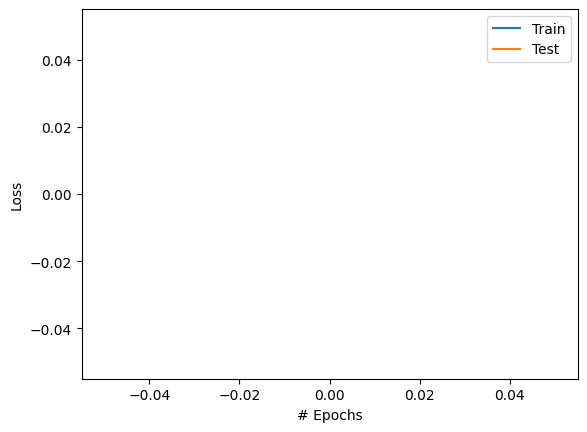

In [ ]:
plt.plot(np.arange(1, epochs + 1), learning_curve_train, label="Train")
plt.plot(np.arange(1, epochs + 1), learning_curve_test, label="Test")
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.legend()